# Importing the Library

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns # used for plot interactive graph
%matplotlib inline

# Loading the Breast Cancer Datasets 

In [3]:
cancer_data=datasets.load_breast_cancer()

In [4]:
#Data
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
#Target value
cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
#Creating the Dataframe from the dataset
data=pd.DataFrame(np.c_[cancer_data['data'],cancer_data['target']],
                  columns= np.append(cancer_data['feature_names'], ['target']))

data.head(80)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.990         10.38          122.80     1001.0          0.11840   
1        20.570         17.77          132.90     1326.0          0.08474   
2        19.690         21.25          130.00     1203.0          0.10960   
3        11.420         20.38           77.58      386.1          0.14250   
4        20.290         14.34          135.10     1297.0          0.10030   
5        12.450         15.70           82.57      477.1          0.12780   
6        18.250         19.98          119.60     1040.0          0.09463   
7        13.710         20.83           90.20      577.9          0.11890   
8        13.000         21.82           87.50      519.8          0.12730   
9        12.460         24.04           83.97      475.9          0.11860   
10       16.020         23.24          102.70      797.8          0.08206   
11       15.780         17.89          103.60      781.0          0.09710   
12       19.170         24.80          132.40     1123.0          0.09740   
13       15.850         23.95          103.70      782.7          0.08401   
14       13.730         22.61           93.60      578.3          0.11310   
15       14.540         27.54           96.73      658.8          0.11390   
16       14.680         20.13           94.74      684.5          0.09867   
17       16.130         20.68          108.10      798.8          0.11700   
18       19.810         22.15          130.00     1260.0          0.09831   
19       13.540         14.36           87.46      566.3          0.09779   
20       13.080         15.71           85.63      520.0          0.10750   
21        9.504         12.44           60.34      273.9          0.10240   
22       15.340         14.26          102.50      704.4          0.10730   
23       21.160         23.04          137.20     1404.0          0.09428   
24       16.650         21.38          110.00      904.6          0.11210   
25       17.140         16.40          116.00      912.7          0.11860   
26       14.580         21.53           97.41      644.8          0.10540   
27       18.610         20.25          122.10     1094.0          0.09440   
28       15.300         25.27          102.40      732.4          0.10820   
29       17.570         15.05          115.00      955.1          0.09847   
..          ...           ...             ...        ...              ...   
50       11.760         21.60           74.72      427.9          0.08637   
51       13.640         16.34           87.21      571.8          0.07685   
52       11.940         18.24           75.71      437.6          0.08261   
53       18.220         18.70          120.30     1033.0          0.11480   
54       15.100         22.02           97.26      712.8          0.09056   
55       11.520         18.75           73.34      409.0          0.09524   
56       19.210         18.57          125.50     1152.0          0.10530   
57       14.710         21.59           95.55      656.9          0.11370   
58       13.050         19.31           82.61      527.2          0.08060   
59        8.618         11.79           54.34      224.5          0.09752   
60       10.170         14.88           64.55      311.9          0.11340   
61        8.598         20.98           54.66      221.8          0.12430   
62       14.250         22.15           96.42      645.7          0.10490   
63        9.173         13.86           59.20      260.9          0.07721   
64       12.680         23.84           82.69      499.0          0.11220   
65       14.780         23.94           97.40      668.3          0.11720   
66        9.465         21.01           60.11      269.4          0.10440   
67       11.310         19.04           71.80      394.1          0.08139   
68        9.029         17.33           58.79      250.5          0.10660   
69       12.780         16.49           81.37      502.5          0.09831   


In [6]:
data.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension     ...      worst texture  \
count     569.000000              569.000000     ...         569.000000   
mean        0.181162                0.062798     ...          25.677223   
std         0.027414                0.007060     ...           6.146258   
min         0.106000                0.049960     ...          12.020000   
25%         0.161900                0.057700     ...          21.080000   
50%         0.179200                0.061540     ...          25.410000   
75%         0.195700                0.066120     ...          29.720000   
max         0.304000                0.097440     ...          49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [8]:
#List of all the columns
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [9]:
'''lets divied the features according to their category''' 
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error']
-----------------------------------
['texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']
------------------------------------
['worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']


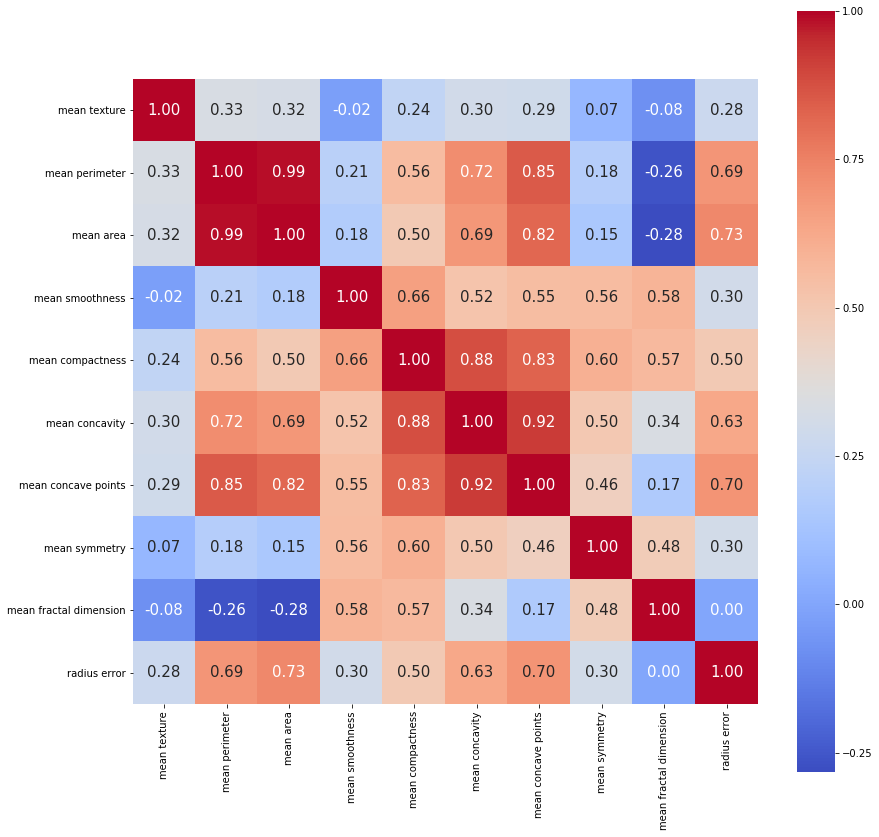

In [10]:
#lets check the correlation between features
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

# Training and Testing Split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(cancer_data.data,cancer_data.target,random_state=0,test_size=0.2)

In [12]:
#Shape of training data
X_train.shape,Y_train.shape

((455, 30), (455,))

In [13]:
#Shape of testing data
X_test.shape,Y_test.shape

((114, 30), (114,))

# Inbuilt KNeighborsClassifier

In [14]:
'''Getting the value of n_neighbors 
   by plotting the X_train and Y_train through different n_neighbors value(1,24) here,
   and through graph we get to know which n_neighbors suits most with 
   highest prediction'''
x_axis=[]
y_axis=[]
for i in range(1,25,2):
    clf=KNeighborsClassifier(n_neighbors=i)
    x_axis.append(i)
    score=cross_val_score(clf,X_train,Y_train)
    y_axis.append(score.mean())
    print(i,score.mean())

1 0.9274863483211341
3 0.9296648077146509
5 0.9252788428023702
7 0.9318723132334147
9 0.9318868362960381
11 0.9252788428023702
13 0.9230858603462297
15 0.9120628558150344
17 0.9120628558150344
19 0.9098553502962705
21 0.9142703613337981
23 0.916477866852562


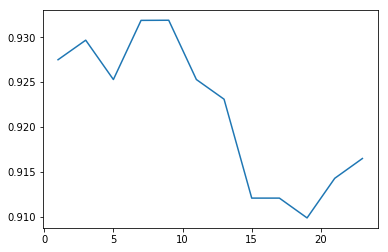

In [15]:
plt.plot(x_axis,y_axis)
plt.show()

In [16]:
clf=KNeighborsClassifier(n_neighbors=7)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [17]:
#fitting the data
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [18]:
Y_predict_inbuilt=clf.predict(X_test)

In [19]:
#Score of the inbuilt classifier
clf.score(X_test,Y_test)

0.9473684210526315

# Implementation of KNeighborsClassifier

In [20]:
'''As in KNeighborsClassifier there is no work perform during training period, 
   as there is only plotting of the training data is there through which we can predict'''
def train(x,y):
    return

In [21]:
'''Predicting the X_test data one by one '''
def predict_one(x_train,y_train,x_test,k):
    #distances list will save the distance of the testing data point
    #from all training data point
    distances=[]
    for i in range(len(x_train)):
        #distance store is square difference distance of given testing point
        distance=((x_train[i,:]-x_test)**2).sum()
        #in distances we will store the ith training point and it's distance from testing point
        distances.append([distance,i])
        '''Sorting the distance list as here we check the distance from 
           training point and testing point should be minimum or we check what are the 
           training point near to the give testing point'''
        distances=sorted(distances)
    targets=[]
    for i in range(k):
            #here in index_of_training we get the training point
            index_of_trainig_data=distances[i][1]
            #and we are storing the class of index_of_training
            targets.append(y_train[index_of_trainig_data])
            
            #here we are taking the most common targets and it return how many time it occur
    return Counter(targets).most_common(1)[0][0]    

In [22]:
'''Prediction function which take x_train,y_train and predict the classes for x_test_data,
   here we are also passing the k which is telling how many nearest neighbors we want to consider'''
def predict(x_train,y_train,x_test_data,k):
    predictions=[]
    for x_test in x_test_data:
        #Get the output from predict_one and storing it into the list 
        predictions.append(predict_one(x_train,y_train,x_test,k))
    return predictions

In [23]:
#Calling the predict function
y_predict=predict(X_train,Y_train,X_test,7)

In [24]:
#Getting the accuracy_score
accuracy_score(Y_test,y_predict)

0.9473684210526315

# Comparing the Score of Inbuilt and Implemented KNeighborsClassifier

In [25]:
#First one is Inbuilt and Second one is Implemented
clf.score(X_test,Y_test),accuracy_score(Y_test,y_predict)

(0.9473684210526315, 0.9473684210526315)

In [26]:
print(classification_report(Y_test,Y_predict_inbuilt))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        47
          1       0.96      0.96      0.96        67

avg / total       0.95      0.95      0.95       114



In [27]:
print(classification_report(Y_test,y_predict))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        47
          1       0.96      0.96      0.96        67

avg / total       0.95      0.95      0.95       114



In [ ]:
'''Show it is clearly visible that Inbuilt KNeighborsClassifier 
  and Implemented KNeighborsClassifier are having same score'''